In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ense mble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Analyse et nettoyage 

In [4]:
tempdata = pd.read_csv("bottle.csv", low_memory=False)
tempdata = tempdata.dropna(axis=1, thresh=len(tempdata) * 0.7)
tempdata = tempdata.dropna(axis=0, thresh=len(tempdata.columns) * 0.9)
tempdata = tempdata.drop(columns=["Depth_ID", "Sta_ID"])

On a essayé de supprimer toutes les lignes et colonnes contenant des NaN et on s'est retrouvé avec une perte importante de données

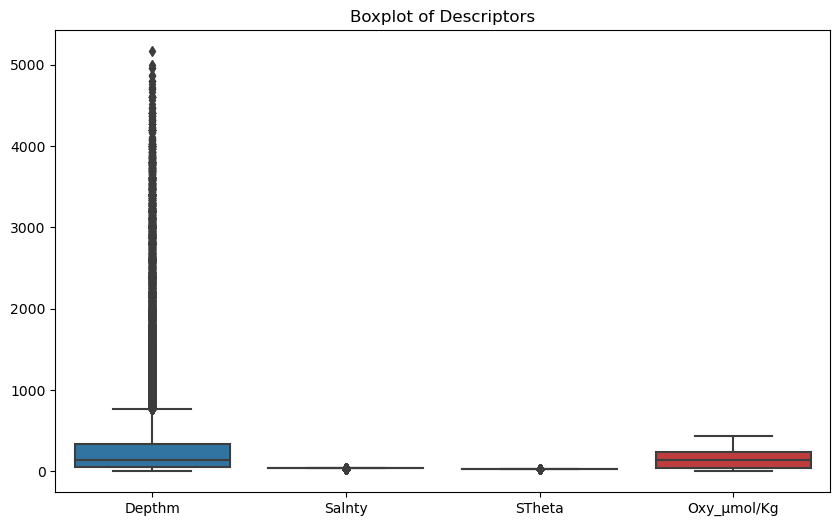

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=tempdata[['Depthm', 'Salnty', 'STheta', 'Oxy_µmol/Kg']])
plt.title('Boxplot of Descriptors')
plt.show()


 *Lien:* researchgate.net/publication/354202958_Validation_d'une_methode_d'imputation_de_donnees_manquantes_pour_la_reconstitution_des_series_de_temperature#pf4 
 
Selon cet article, l'auteur a conclu que la méthode la plus efficace pour traiter les données manquantes de température était missForest.
Cette librairie n'est pas disponible donc nous avons opté pour KNNImputer

In [6]:
# Sample from the preprocessed data
sample_size = 300
sampled_df = tempdata.sample(n=sample_size, random_state=42)

imputer = KNNImputer(n_neighbors=2, weights="uniform")
tempdata_imputed = imputer.fit_transform(sampled_df)

# Convert the imputed data back to a DataFrame
tempdata_imputed_df = pd.DataFrame(tempdata_imputed, columns=sampled_df.columns)

print("Original dataset:")
print(tempdata)
print("\nImputed dataset:")
print(tempdata_imputed_df)

Original dataset:
        Cst_Cnt  Btl_Cnt  Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  \
2160         71     2161       0   10.30  33.030    5.90  25.364   92.8   
2161         71     2162       6   18.46  32.920    6.02  23.568  111.8   
2162         71     2163      10   10.29  32.951    6.04  25.304   95.0   
2163         71     2164      15   10.29  32.990    6.06  25.335   95.3   
2164         71     2165      20   10.33  33.005    6.04  25.339   95.1   
...         ...      ...     ...     ...     ...     ...     ...    ...   
410762    15532   410763     234    8.37  34.198    1.63  26.592   24.7   
410763    15532   410764     250    8.15  34.195    1.57  26.623   23.7   
410764    15532   410765     273    7.80  34.188    1.49  26.670   22.3   
410765    15532   410766     300    7.33  34.185    1.33  26.735   19.7   
410766    15532   410767     330    6.86  34.191    1.13  26.805   16.6   

        Oxy_µmol/Kg  RecInd  ...  R_Depth  R_TEMP  R_POTEMP  R_SALINITY  \
2160  

Nous pouvions utiliser le SimpleImputer pour la salinité et le STheta qui ont tous les deux des variances négligeables(concentration des valeurs dans un intervalle réduit)

In [7]:
print("Nombre de valeurs manquante par colonne : ", tempdata_imputed_df.isnull().sum())

Nombre de valeurs manquante par colonne :  Cst_Cnt        0
Btl_Cnt        0
Depthm         0
T_degC         0
Salnty         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
RecInd         0
T_prec         0
S_prec         0
P_qual         0
Chlqua         0
Phaqua         0
PO4q           0
SiO3qu         0
NO2q           0
NO3q           0
NH3q           0
C14A1q         0
C14A2q         0
DarkAq         0
MeanAq         0
R_Depth        0
R_TEMP         0
R_POTEMP       0
R_SALINITY     0
R_SIGMA        0
R_SVA          0
R_DYNHT        0
R_O2           0
R_O2Sat        0
R_PRES         0
dtype: int64


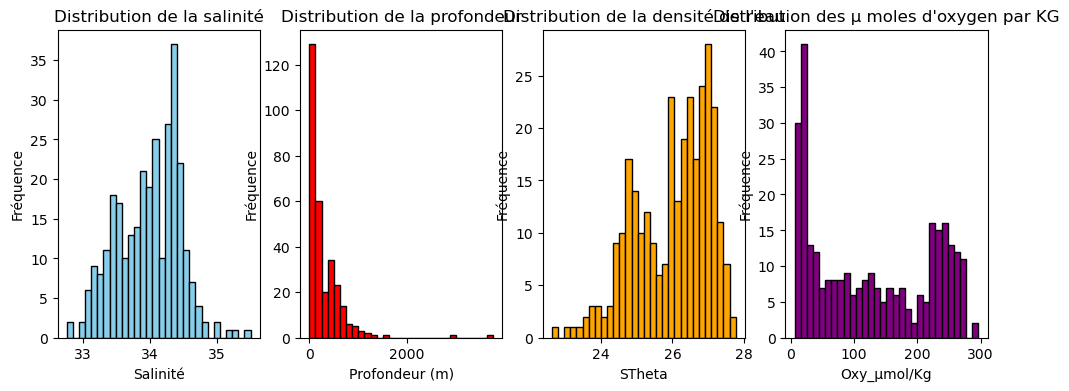

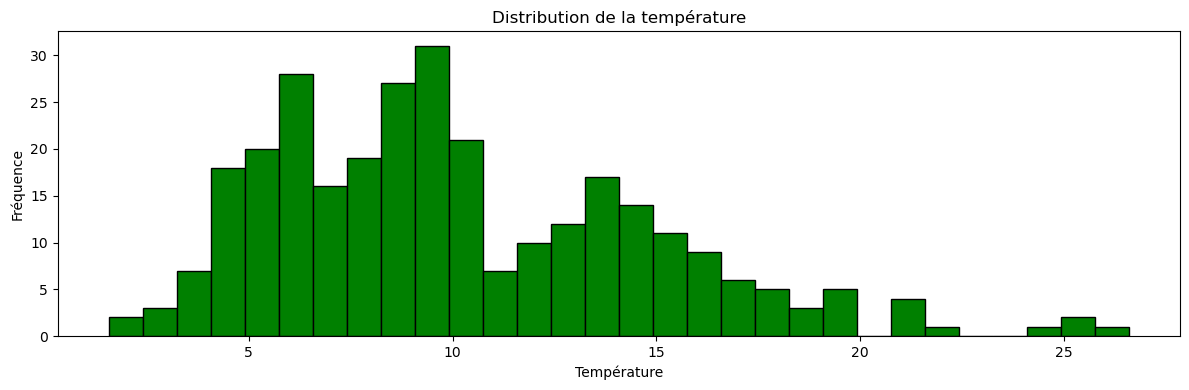

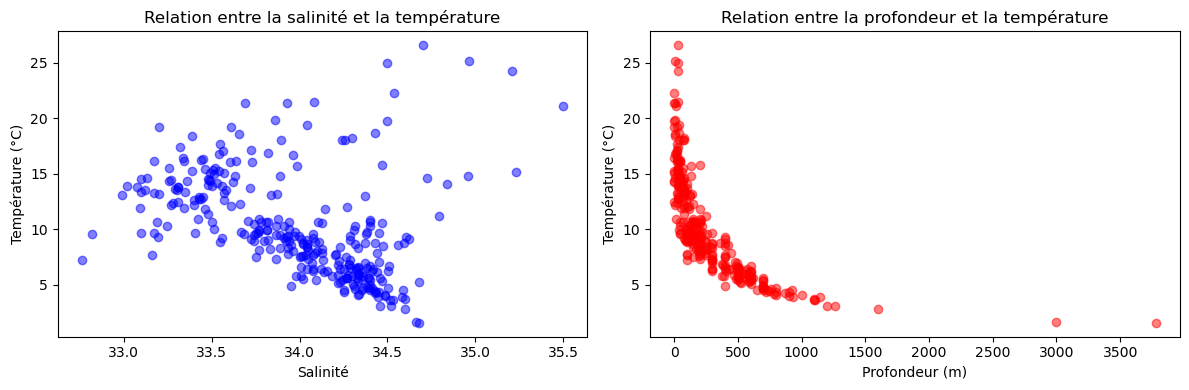

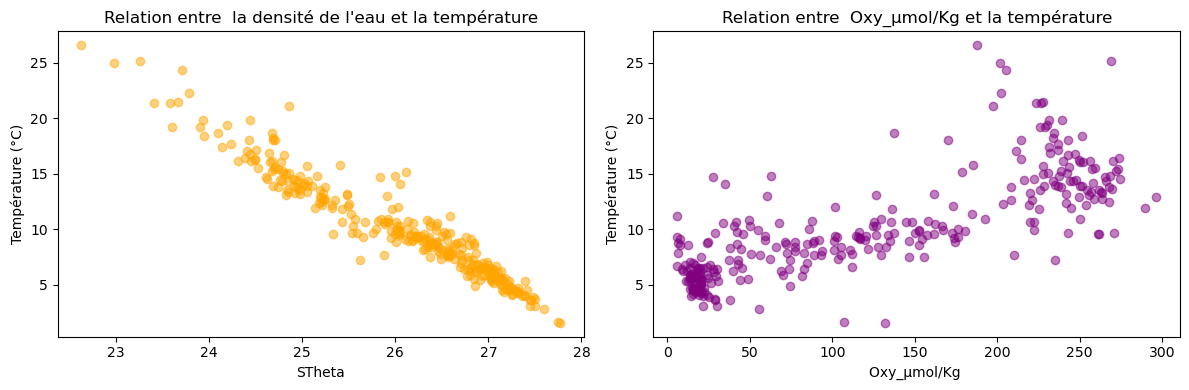

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.hist(tempdata_imputed_df['Salnty'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution de la salinité')
plt.xlabel('Salinité')
plt.ylabel('Fréquence')

plt.subplot(1, 4, 2)
plt.hist(tempdata_imputed_df['Depthm'], bins=30, color='red', edgecolor='black')
plt.title('Distribution de la profondeur')
plt.xlabel('Profondeur (m)')
plt.ylabel('Fréquence')

plt.subplot(1, 4, 3)
plt.hist(tempdata_imputed_df['STheta'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution de la densité de l\'eau')
plt.xlabel('STheta')
plt.ylabel('Fréquence')


plt.subplot(1, 4, 4)
plt.hist(tempdata_imputed_df['Oxy_µmol/Kg'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution des µ moles d\'oxygen par KG'  )
plt.xlabel('Oxy_µmol/Kg')
plt.ylabel('Fréquence')

plt.figure(figsize=(12, 4))
plt.subplot(1, 1, 1)
plt.hist(tempdata_imputed_df['T_degC'], bins=30, color='green', edgecolor='black')
plt.title('Distribution de la température')
plt.xlabel('Température')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(tempdata_imputed_df['Salnty'], tempdata_imputed_df['T_degC'], alpha=0.5, color='blue')
plt.title('Relation entre la salinité et la température')
plt.xlabel('Salinité')
plt.ylabel('Température (°C)')

plt.subplot(1, 2, 2)
plt.scatter(tempdata_imputed_df['Depthm'], tempdata_imputed_df['T_degC'], alpha=0.5, color='red')
plt.title('Relation entre la profondeur et la température')
plt.xlabel('Profondeur (m)')
plt.ylabel('Température (°C)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(tempdata_imputed_df['STheta'], tempdata_imputed_df['T_degC'], alpha=0.5, color='orange')
plt.title('Relation entre  la densité de l\'eau et la température')
plt.xlabel('STheta')
plt.ylabel('Température (°C)')

plt.subplot(1, 2, 2)
plt.scatter(tempdata_imputed_df['Oxy_µmol/Kg'], tempdata_imputed_df['T_degC'], alpha=0.5, color='purple')
plt.title('Relation entre  Oxy_µmol/Kg et la température')
plt.xlabel('Oxy_µmol/Kg ')
plt.ylabel('Température (°C)')

plt.tight_layout()
plt.show()




# Correlation

On normalise les valeurs (mapping vers [0,1])

In [9]:
scaler = MinMaxScaler() 
arr_scaled = scaler.fit_transform(tempdata_imputed_df) 
df_scaled = pd.DataFrame(arr_scaled, columns=tempdata_imputed_df.columns,index=tempdata_imputed_df.index)
print(df_scaled)

      Cst_Cnt   Btl_Cnt    Depthm    T_degC    Salnty    O2ml_L    STheta  \
0    0.692037  0.681406  0.056349  0.306432  0.419555  0.382883  0.700816   
1    0.330211  0.334993  0.000000  0.791450  0.426852  0.747748  0.185264   
2    0.897931  0.909781  0.007937  0.446664  0.243342  0.887387  0.505443   
3    0.357728  0.357580  0.052910  0.313224  0.557826  0.183183  0.753110   
4    0.218970  0.243374  0.007937  1.000000  0.708136  0.624625  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
295  0.386417  0.382158  0.013228  0.587695  0.248814  0.839339  0.362364   
296  0.009303  0.010507  0.013228  0.318817  0.021525  0.881381  0.524689   
297  0.615470  0.605644  0.031481  0.411506  0.255381  0.755255  0.543546   
298  0.873016  0.879036  0.064286  0.299640  0.557096  0.183183  0.763608   
299  0.001952  0.002239  0.017989  0.491011  0.200657  0.795796  0.444790   

        O2Sat  Oxy_µmol/Kg  RecInd  ...   R_Depth    R_TEMP  R_POTEMP  \
0 

In [10]:
colonnes = []
for nom_colonne in df_scaled.columns:
    if not nom_colonne.startswith("R_"):
        colonnes.append(nom_colonne)
tempdata_sans_R = df_scaled[colonnes]
print(tempdata_sans_R)

tempdata_sans_R.corr().style.background_gradient(cmap='coolwarm')
corr_temp= tempdata_sans_R.corrwith(tempdata_sans_R['T_degC'])
corr_temp=pd.DataFrame(corr_temp).style.background_gradient(cmap='coolwarm')
corr_temp


      Cst_Cnt   Btl_Cnt    Depthm    T_degC    Salnty    O2ml_L    STheta  \
0    0.692037  0.681406  0.056349  0.306432  0.419555  0.382883  0.700816   
1    0.330211  0.334993  0.000000  0.791450  0.426852  0.747748  0.185264   
2    0.897931  0.909781  0.007937  0.446664  0.243342  0.887387  0.505443   
3    0.357728  0.357580  0.052910  0.313224  0.557826  0.183183  0.753110   
4    0.218970  0.243374  0.007937  1.000000  0.708136  0.624625  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
295  0.386417  0.382158  0.013228  0.587695  0.248814  0.839339  0.362364   
296  0.009303  0.010507  0.013228  0.318817  0.021525  0.881381  0.524689   
297  0.615470  0.605644  0.031481  0.411506  0.255381  0.755255  0.543546   
298  0.873016  0.879036  0.064286  0.299640  0.557096  0.183183  0.763608   
299  0.001952  0.002239  0.017989  0.491011  0.200657  0.795796  0.444790   

        O2Sat  Oxy_µmol/Kg  RecInd  ...  Phaqua  PO4q  SiO3qu  NO2q  NO3q  

,0
Cst_Cnt,0.114856
Btl_Cnt,0.112128
Depthm,-0.658067
T_degC,1.000000
Salnty,-0.351037
O2ml_L,0.769016
STheta,-0.961768
O2Sat,0.830853
Oxy_µmol/Kg,0.769547
RecInd,-0.125077


On regarde les colonnes ayant une forte correlation avec T_degC

In [11]:
corr_cleanData = tempdata_sans_R.corr()['T_degC']
corrélés = abs(corr_cleanData) >= 0.4
data_final = pd.DataFrame()
for col in corrélés.index : #On les ajoute
    if (corrélés[col] == True and not col.startswith("R")) :
        data_final[col] = tempdata_sans_R[col]
print(data_final)

       Depthm    T_degC    O2ml_L    STheta     O2Sat  Oxy_µmol/Kg
0    0.056349  0.306432  0.382883  0.700816  0.306915     0.382502
1    0.000000  0.791450  0.747748  0.185264  0.769231     0.748977
2    0.007937  0.446664  0.887387  0.505443  0.765346     0.887372
3    0.052910  0.313224  0.183183  0.753110  0.148407     0.182957
4    0.007937  1.000000  0.624625  0.000000  0.709402     0.626266
..        ...       ...       ...       ...       ...          ...
295  0.013228  0.587695  0.839339  0.362364  0.779332     0.839944
296  0.013228  0.318817  0.881381  0.524689  0.705517     0.881279
297  0.031481  0.411506  0.755255  0.543546  0.639472     0.755099
298  0.064286  0.299640  0.183183  0.763608  0.147630     0.182946
299  0.017989  0.491011  0.795796  0.444790  0.702409     0.796034

[300 rows x 6 columns]


In [12]:
data_final.corr().style.background_gradient(cmap='coolwarm')

,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg
Depthm,1.000000,-0.658067,-0.561945,0.666083,-0.573064,-0.562065
T_degC,-0.658067,1.000000,0.769016,-0.961768,0.830853,0.769547
O2ml_L,-0.561945,0.769016,1.000000,-0.879172,0.992306,0.999999
STheta,0.666083,-0.961768,-0.879172,1.000000,-0.922266,-0.879623
O2Sat,-0.573064,0.830853,0.992306,-0.922266,1.000000,0.992435
Oxy_µmol/Kg,-0.562065,0.769547,0.999999,-0.879623,0.992435,1.000000


Encore une fois on remarque une corrélation importante entre Oxy_µmol/Kg et O2ml_L et O2Sat On peut donc garder le premier

In [13]:
features_ch = ['Salnty', 'Depthm', 'T_degC','Oxy_µmol/Kg','STheta']
correlation_matrix = data_final[features_ch].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation entre les descripteurs sélectionnés')
plt.show()

KeyError: "['Salnty'] not in index"

In [14]:
# Statistiques descriptives
descriptive_stats =data_final[['T_degC', 'Depthm','Salnty','STheta','Oxy_µmol/Kg']].describe()
print(descriptive_stats)

# Diagrammes de dispersion
sns.pairplot(data_final[['T_degC', 'Depthm','Salnty','STheta','Oxy_µmol/Kg']])
plt.show()

# Créer une figure et des sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Premier graphique
sns.boxplot(x='T_degC', y='Salnty', data =data_final, ax=axes[0])
axes[0].set_title('Boîtes à moustaches de Salnty selon T_degC')

# Deuxième graphique
sns.boxplot(x='Depthm', y='Salnty', data = data_final, ax=axes[1])
axes[1].set_title('Boîtes à moustaches de Salnty selon Depthm')

# Troisième graphique
sns.boxplot(x='Salnty', y='Salnty', data = data_final, ax=axes[2])
axes[2].set_title('Boîtes à moustaches de Salnty')

# Afficher les graphiques
plt.tight_layout()
plt.show()

KeyError: "['Salnty'] not in index"

In [15]:
X = tempdata_imputed_df[[ 'Depthm','Salnty','STheta','Oxy_µmol/Kg']]
y = tempdata_imputed_df['T_degC']  # Variable cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ingénierie des descripteurs et modélisation 

## Régression linéaire

In [16]:
# Créer le modèle de régression linéaire
model = LinearRegression()

In [17]:
# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [19]:
#Évaluer le modèle
print("\033[91mPrécision de la Régression Linéaire : \033[0m", model.score(X_test, y_test))

Précision de la Régression Linéaire :  0.9922112130235078


## SVM

In [20]:
# Création du modèle SVM pour la régression
svm_regressor = SVR(kernel='linear')

In [21]:
# Entraînement du modèle
svm_regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [22]:
# Prédiction sur l'ensemble de test
y_pred = svm_regressor.predict(X_test)

In [23]:
#Évaluer le modèle
print("\033[91mPrécision du modèle SVM : \033[0m", svm_regressor.score(X_test, y_test))

Précision du modèle SVM :  0.9941366518802207


## Random Forest

In [24]:
# Création du modèle de forêt d'arbres décisionnels
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [25]:
# Entraînement du modèle
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Prédiction sur l'ensemble de test
y_pred = rf_regressor.predict(X_test)

In [27]:
#Évaluer le modèle
print("\033[91mPrécision du modèle Random Forest : \033[0m", model.score(X_test, y_test))

Précision du modèle Random Forest :  0.9922112130235078


# Création de nouveaux descripteurs non linéaires à l'aide de la transformation polynomiale avec PolynomialFeatures 

In [28]:
degree = 2  # Degré du polynôme
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entraîner le modèle
polyreg.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = polyreg.predict(X_test)

#Évaluer le modèle
print("\033[91mPrécision du modèle : \033[0m", polyreg.score(X_test, y_test))

Précision du modèle :  0.9996564246885199


# Evaluation des performance

In [29]:
def evaluate_model(model, X_test, y_test):
    """
    Évalue un modèle en utilisant différentes métriques d'évaluation et affiche les résultats.

    Args:
    - model: Le modèle entraîné à évaluer.
    - X_test (array-like): Les features de l'ensemble de test.
    - y_test (array-like): Les vraies valeurs cibles de l'ensemble de test.
    """
    # Prédire les valeurs sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Calculer les différentes métriques d'évaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    msle = mean_squared_log_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Afficher les résultats
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("Coefficient of Determination (R²):", r2)
    print("Mean Squared Logarithmic Error (MSLE):", msle)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Percentage Error (MAPE):", mape)

## PolynomialFeatures 

In [30]:
evaluate_model(polyreg, X_test, y_test)

Mean Squared Error (MSE): 0.005884408251714567
Mean Absolute Error (MAE): 0.04838743480373959
Coefficient of Determination (R²): 0.9996564246885199
Mean Squared Logarithmic Error (MSLE): 7.555645561065141e-05
Root Mean Squared Error (RMSE): 0.07670989669993414
Mean Absolute Percentage Error (MAPE): 0.005806653219220078


 En moyenne, les prédictions du modèle ont une erreur absolue de pourcentage de 0.04%. Cela indique que, en moyenne, les prédictions du modèle s'écartent d'environ 0.04% des vraies valeurs cibles

## Régression linéaire

In [31]:
evaluate_model(model, X_test, y_test)

Mean Squared Error (MSE): 0.13339841607905764
Mean Absolute Error (MAE): 0.2644335782319251
Coefficient of Determination (R²): 0.9922112130235078
Mean Squared Logarithmic Error (MSLE): 0.0018304018628664703
Root Mean Squared Error (RMSE): 0.3652374790174985
Mean Absolute Percentage Error (MAPE): 0.033347526595330176


 En moyenne, les prédictions du modèle ont une erreur absolue de pourcentage de 0.3%. Cela indique que, en moyenne, les prédictions du modèle s'écartent d'environ 0.3% des vraies valeurs cibles

## SVM

In [32]:
evaluate_model(svm_regressor, X_test, y_test)

Mean Squared Error (MSE): 0.10042145901016021
Mean Absolute Error (MAE): 0.2229052593369252
Coefficient of Determination (R²): 0.9941366518802207
Mean Squared Logarithmic Error (MSLE): 0.0011233584635959744
Root Mean Squared Error (RMSE): 0.31689345056368745
Mean Absolute Percentage Error (MAPE): 0.02616276254470857


En moyenne, les prédictions du modèle ont une erreur absolue de pourcentage de 0.2%. Cela indique que, en moyenne, les prédictions du modèle s'écartent d'environ 0.2% des vraies valeurs cibles

## Random Forest

In [33]:
evaluate_model(rf_regressor, X_test, y_test)

Mean Squared Error (MSE): 0.1621558018333329
Mean Absolute Error (MAE): 0.2923783333333327
Coefficient of Determination (R²): 0.9905321439743812
Mean Squared Logarithmic Error (MSLE): 0.002421026572089641
Root Mean Squared Error (RMSE): 0.4026857358205439
Mean Absolute Percentage Error (MAPE): 0.03779302559747977
